(matrix-decomposition)=
# Decomposição de matrizes

## Eigen Decomposition

Sejam um vetor $v$ e uma matriz $\mathbf{A}$. $v$ é um autovetor de $\mathbf{A}$ se o produto $\mathbf{A}v$ alterar apenas o tamanho de $v$:

$$\mathbf{A}v = \lambda v$$

onde $\lambda$ é um escalar chamado de autovalor correspondendo ao vetor $v$.

A utilidade disso envolve representar a matriz de outra maneira que possa ser útil, essa é a `eigen decomposition`.

Se $\mathbf{A}$ tiver $n$ autovetores linearmente independentes com seus respectivos autovalores. Podemos recriar a matriz original com a operação:

$$\mathbf{A} = \mathbf{V} \mathbf{ \Lambda } \mathbf{V}^{-1},$$

onde $\mathbf{V}$ é a matriz criada concatenando todos os autovetores coluna e $\mathbf{\Lambda}$ é a matriz diagonal com cada um dos autovalores na diagonal principal.

In [1]:
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1.16,0.58],[0.25,1.08]])

# Compute the eigenvalues and right eigenvectors of a square array
λ,V =  LA.eig(A)

In [2]:
np.diag(λ)

array([[1.50288379, 0.        ],
       [0.        , 0.73711621]])

In [3]:
V

array([[ 0.86082477, -0.80802933],
       [ 0.50890149,  0.58914226]])

In [4]:
# reconstruindo A
V @ np.diag(λ) @ LA.inv(V)

array([[1.16, 0.58],
       [0.25, 1.08]])

In [5]:
A @ V.T[0]

array([1.29371959, 0.7648198 ])

Na figura a seguir vemos que o vetor $v_{1}$ é um autovetor de $\mathbf{A}$ pois aponta na mesma direção de $\mathbf{A}v_{1}$, ou seja, é uma transformação linear que não rotaciona o vetor, só aumenta seu tamanho. O mesmo não acontece com o vetor $w$, então este não é um autovetor de $\mathbf{A}$.

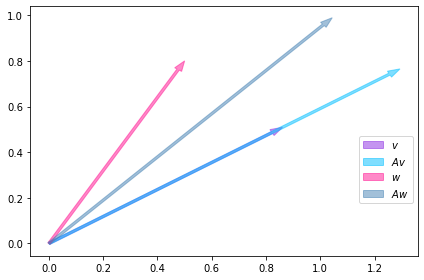

In [6]:
v1 = A @ V.T[0]
w1 = np.array([0.5,0.8])
Aw1 = A @ w1

plt.arrow(x=0,y=0,dx=V.T[0][0],dy=V.T[0][1],length_includes_head=True,width=0.01,shape="full",label=r"$v$",color="blueviolet",alpha=0.5)
plt.arrow(x=0,y=0,dx=v1[0],dy=v1[1],length_includes_head=True,width=0.01,shape="full",label=r"$Av$",color="deepskyblue",alpha=0.5)
plt.arrow(x=0,y=0,dx=w1[0],dy=w1[1],length_includes_head=True,width=0.01,shape="full",label=r"$w$",color="deeppink",alpha=0.5)
plt.arrow(x=0,y=0,dx=Aw1[0],dy=Aw1[1],length_includes_head=True,width=0.01,shape="full",label=r"$Aw$",color="steelblue",alpha=0.5)
plt.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.tight_layout()
plt.show()

Nas duas figuras a seguir vemos que a aplicação sucessiva de da transformação linear sobre $w$ faz com que o vetor resultante se aproxime da direção do autovetor $v$. Isso ocorre pois $\mathbf{A}$ é uma entidade matemática que determina a dinâmica do sistema. Nesse exemplo vemos que se o sistema se encontrar no estado dado por $w$ ele vai evoluir de tal forma que acabará apontando na direção do autovetor $v$, então $v$ nos informa de antemão a direção para a qual o sistema pode evoluir sem a necessidade a calcularmos os produtos $\mathbf{A}^{n}w$.

In [2]:
def apply_transformation(n,w,A):
    Aw = [np.eye(2) @ w]
    for i in range(1,n):
        Aw += [A @ Aw[-1]]
    return Aw

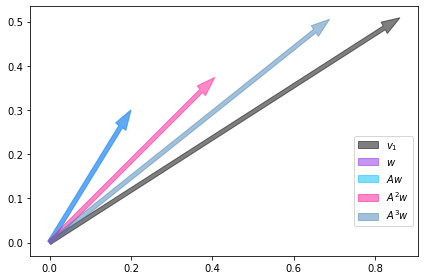

In [8]:
w1 = np.array([0.2,0.3])
Aw = apply_transformation(3,w1,A)

plt.arrow(x=0,y=0,dx=V.T[0][0],dy=V.T[0][1],length_includes_head=True,width=0.01,shape="full",label=r"$v_{1}$",color="black",alpha=0.5)
plt.arrow(x=0,y=0,dx=w1[0],dy=w1[1],length_includes_head=True,width=0.01,shape="full",label=r"$w$",color="blueviolet",alpha=0.5)
plt.arrow(x=0,y=0,dx=Aw[0][0],dy=Aw[0][1],length_includes_head=True,width=0.01,shape="full",label=r"$Aw}$",color="deepskyblue",alpha=0.5)
plt.arrow(x=0,y=0,dx=Aw[1][0],dy=Aw[1][1],length_includes_head=True,width=0.01,shape="full",label=r"$A^{2}w$",color="deeppink",alpha=0.5)
plt.arrow(x=0,y=0,dx=Aw[2][0],dy=Aw[2][1],length_includes_head=True,width=0.01,shape="full",label=r"$A^{3}w$",color="steelblue",alpha=0.5)
plt.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.tight_layout()
plt.show()

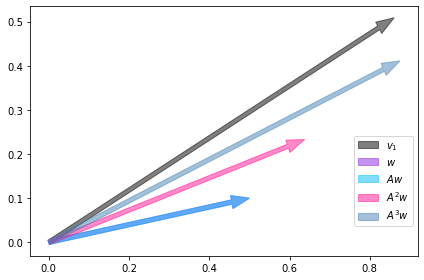

In [9]:
w1 = np.array([0.5,0.1])
Aw = apply_transformation(3,w1,A)

plt.arrow(x=0,y=0,dx=V.T[0][0],dy=V.T[0][1],length_includes_head=True,width=0.01,shape="full",label=r"$v_{1}$",color="black",alpha=0.5)
plt.arrow(x=0,y=0,dx=w1[0],dy=w1[1],length_includes_head=True,width=0.01,shape="full",label=r"$w$",color="blueviolet",alpha=0.5)
plt.arrow(x=0,y=0,dx=Aw[0][0],dy=Aw[0][1],length_includes_head=True,width=0.01,shape="full",label=r"$Aw}$",color="deepskyblue",alpha=0.5)
plt.arrow(x=0,y=0,dx=Aw[1][0],dy=Aw[1][1],length_includes_head=True,width=0.01,shape="full",label=r"$A^{2}w$",color="deeppink",alpha=0.5)
plt.arrow(x=0,y=0,dx=Aw[2][0],dy=Aw[2][1],length_includes_head=True,width=0.01,shape="full",label=r"$A^{3}w$",color="steelblue",alpha=0.5)
plt.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.tight_layout()
plt.show()

A direção de $v$ não é única, o outro autovetor indica outra direção para a qual o sistema pode evoluir.

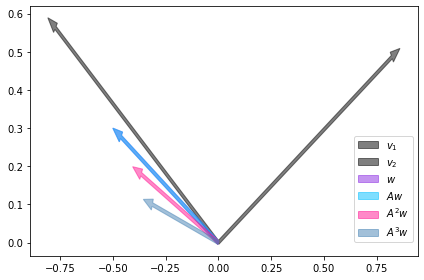

In [10]:
w1 = np.array([-0.5,0.3])
Aw = apply_transformation(3,w1,A)

plt.arrow(x=0,y=0,dx=V.T[0][0],dy=V.T[0][1],length_includes_head=True,width=0.01,shape="full",label=r"$v_{1}$",color="black",alpha=0.5)
plt.arrow(x=0,y=0,dx=V.T[1][0],dy=V.T[1][1],length_includes_head=True,width=0.01,shape="full",label=r"$v_{2}$",color="black",alpha=0.5)
plt.arrow(x=0,y=0,dx=w1[0],dy=w1[1],length_includes_head=True,width=0.01,shape="full",label=r"$w$",color="blueviolet",alpha=0.5)
plt.arrow(x=0,y=0,dx=Aw[0][0],dy=Aw[0][1],length_includes_head=True,width=0.01,shape="full",label=r"$Aw}$",color="deepskyblue",alpha=0.5)
plt.arrow(x=0,y=0,dx=Aw[1][0],dy=Aw[1][1],length_includes_head=True,width=0.01,shape="full",label=r"$A^{2}w$",color="deeppink",alpha=0.5)
plt.arrow(x=0,y=0,dx=Aw[2][0],dy=Aw[2][1],length_includes_head=True,width=0.01,shape="full",label=r"$A^{3}w$",color="steelblue",alpha=0.5)
plt.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.tight_layout()
plt.show()

A evolução de um estado pode ser percebida na próxima figura. Os vetores indicam a posição a cada aplicação da transformação em $w$ e formam a trajetória que o sistema terá se partir do ponto inicial dado por $w$.

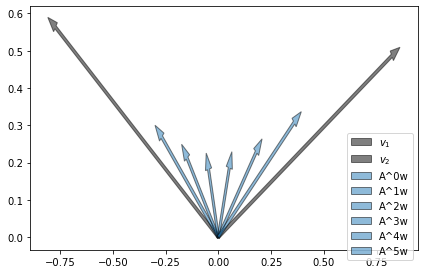

In [11]:
w1 = np.array([-0.3,0.3])
Aw = apply_transformation(6,w1,A)

plt.arrow(x=0,y=0,dx=V.T[0][0],dy=V.T[0][1],length_includes_head=True,width=0.01,shape="full",label=r"$v_{1}$",color="black",alpha=0.5)
plt.arrow(x=0,y=0,dx=V.T[1][0],dy=V.T[1][1],length_includes_head=True,width=0.01,shape="full",label=r"$v_{2}$",color="black",alpha=0.5)
for i,item in enumerate(Aw):
    plt.arrow(x=0,y=0,dx=item[0],dy=item[1],length_includes_head=True,width=0.01,shape="full",label=f"A^{i}w",alpha=0.5)
plt.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.tight_layout()
plt.show()

Em machine learning existem diversas aplicações desse tipo de decomposição. Em PCA, por exemplo, estaremos interessados em achar os principais autovetores e usá-los como base de um espaço vetorial para projetar cada uma das observações nestas direções, já que sabemos que o sistema irá evoluir para estas direções. Em um problema de classificação, cada autovetor pode representar uma classe diferente. Em geral, ao usar PCA perdemos um pouco de informação nesse processo em troca da dominuição da complexidade.

Outra característica interessante que podemos aprender sobre o sistema é se a aplicação sucessiva da transformação fará o volume do espaço diminuir, aumentar ou permanecer igual. Isso pode ser verificado através do determinante da transformação, que por sinal é igual ao produto de todos os autovalores:

- se $\vert det(\mathbf{A}) \vert < 1$, o volume diminui
- se $\vert det(\mathbf{A}) \vert = 1$, o volume é preservado
- se $\vert det(\mathbf{A}) \vert > 1$, o volume aumenta

In [15]:
abs(LA.det(A)),λ[0]*λ[1]

(1.1078000000000001, 1.1078)